This notebook contains the final model testing for the MIT ADSP capstone project on facial emotion detection.

Performed here:
- Setup drive and paths specific to Google Colab
- Access common functions script
- Load the final selected model architecture and weights
- Show confusion matrix and classification report on unseen test data
- Visualize misclassified images

Google Colab Setup

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Set main directory
main_directory = '/content/drive/MyDrive/facial-emotion-detection-cnn'

# Set temporary working directory
temp_directory = '/content/'

Mounted at /content/drive


In [2]:
import os
from pathlib import Path

Access 'common_functions.py' file

In [3]:
# Specify path to common functions python file
project_path = Path(os.path.join(main_directory, 'notebooks'))
common_functions_file = 'common_functions.py'

# Construct the full path of common functions python file
full_path = project_path / common_functions_file

# Use exec to run the file
exec(open(full_path).read())

Setup directories and filepaths

In [4]:
# Specify model name
model_name = 'final_vgg_model_7'

# Specify model storage directory
model_storage_directory = os.path.join(main_directory, 'models')

# Specify model filepath
storage_checkpoint_filepath = os.path.join(model_storage_directory, f'{model_name}_checkpoint.weights.h5')

# Specify location of test data
test_dir = os.path.join(main_directory, 'data/unique_images/test')

Load the model architecture and weights then compile

In [6]:
# Parameters for the final selected model
model_name = model_name
train_data_aug = 'mid'
architecture_choice = 'VGG16'
num_unfreeze = 2
add_dense = True
learning_rate = 0.00001
batch_size = 32
class_weight_balance = False
epochs = 20

# Set the model structure
model = set_model_structure(architecture_choice, num_unfreeze, add_dense)

# Load the weights
model.load_weights(storage_checkpoint_filepath)

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Show model performance on the unseen test data

Found 126 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 87s 24s/step


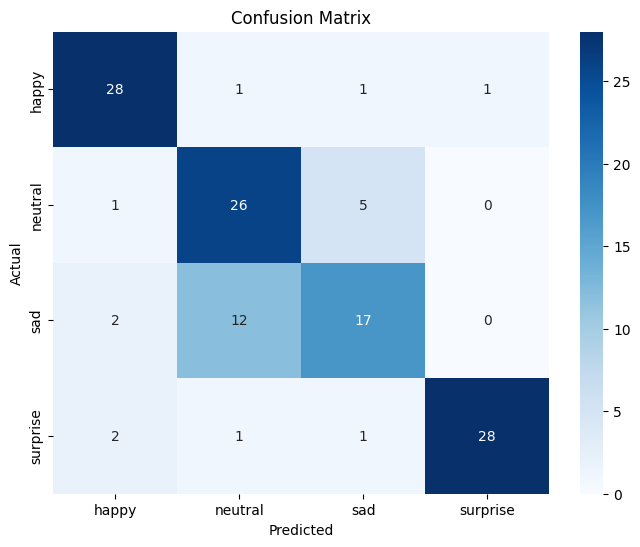


Classification Report:
               precision    recall  f1-score   support

       happy       0.85      0.90      0.88        31
     neutral       0.65      0.81      0.72        32
         sad       0.71      0.55      0.62        31
    surprise       0.97      0.88      0.92        32

    accuracy                           0.79       126
   macro avg       0.79      0.78      0.78       126
weighted avg       0.79      0.79      0.78       126




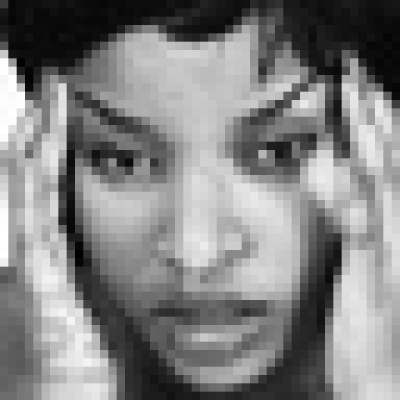
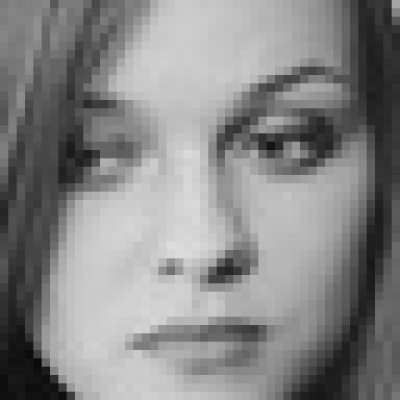
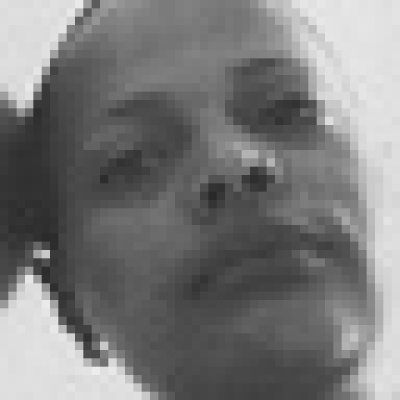
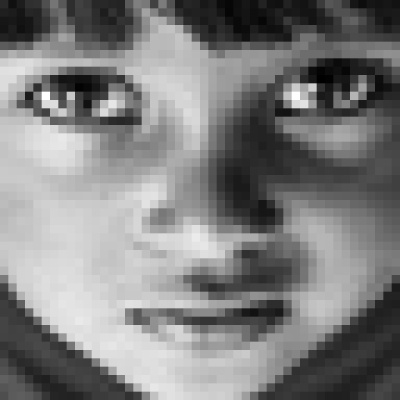
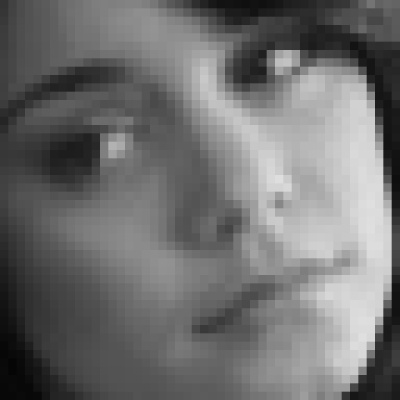
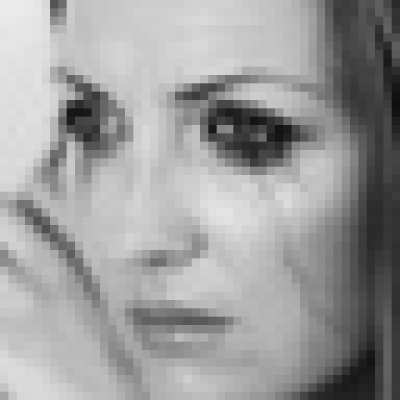
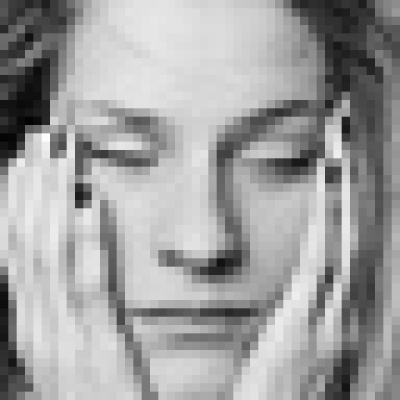
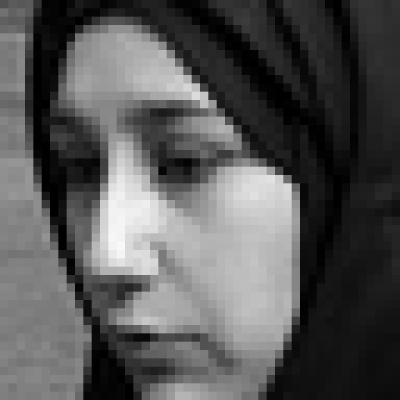
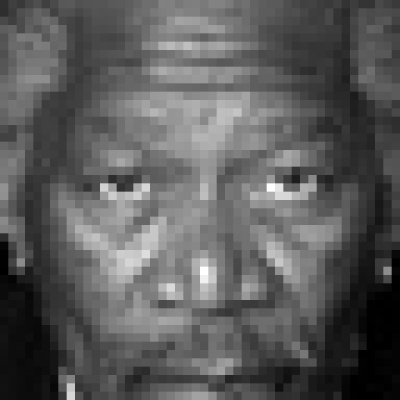
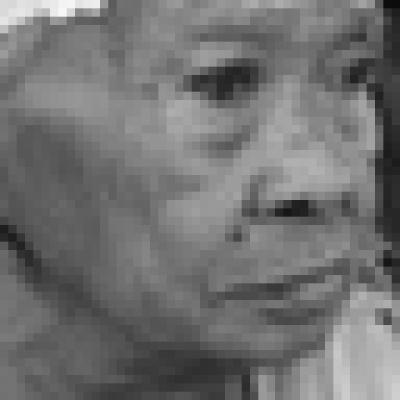
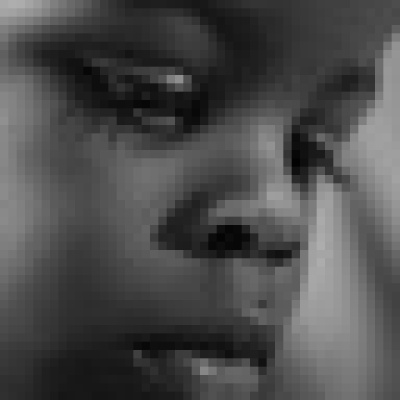
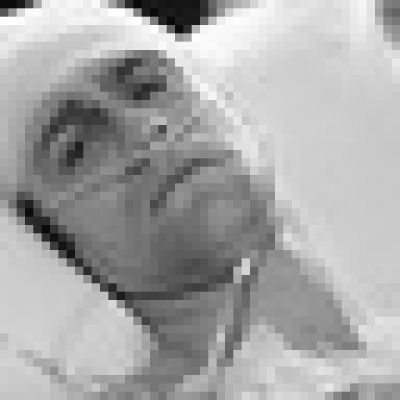
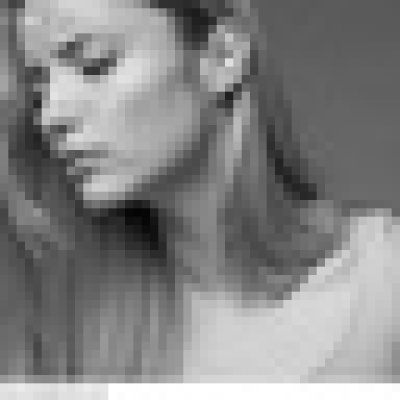
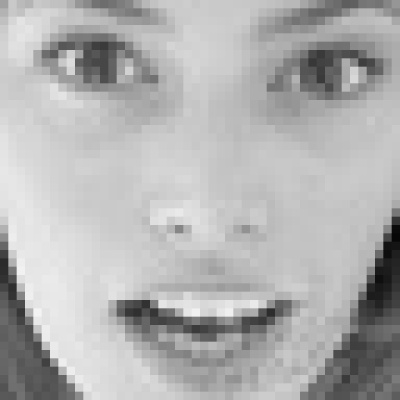
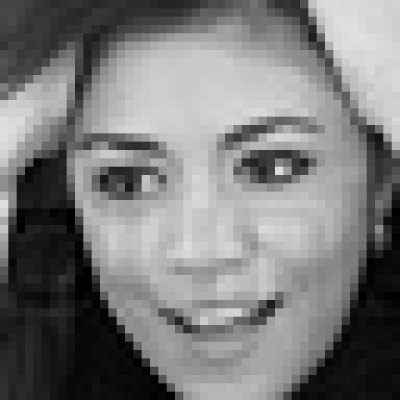
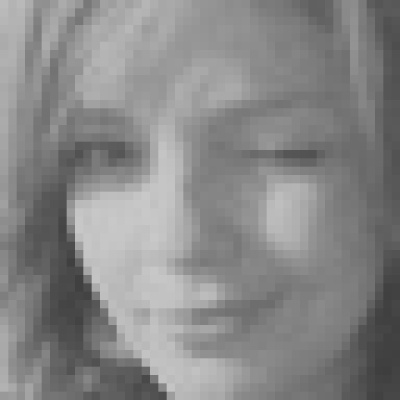
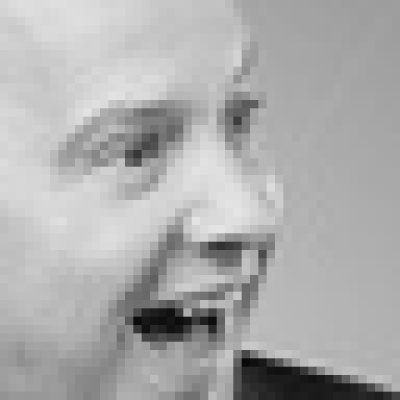
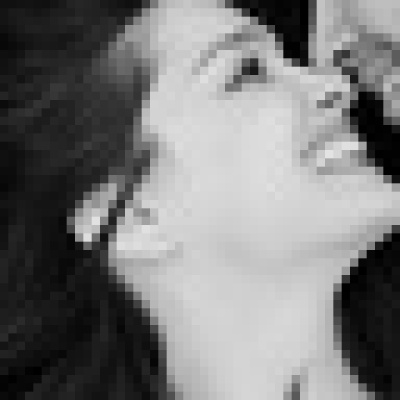
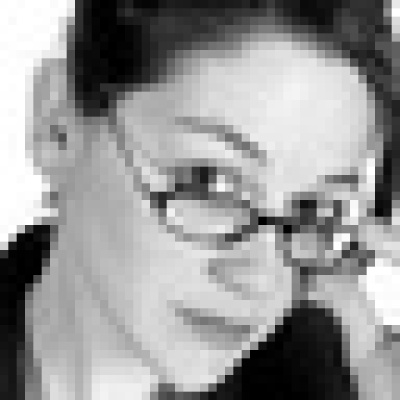
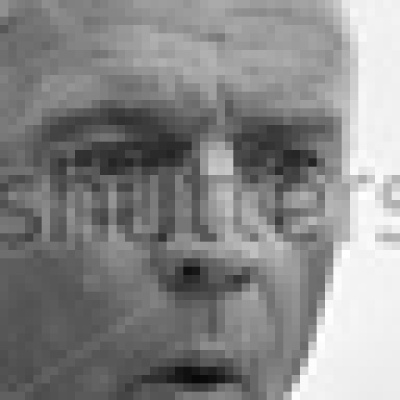
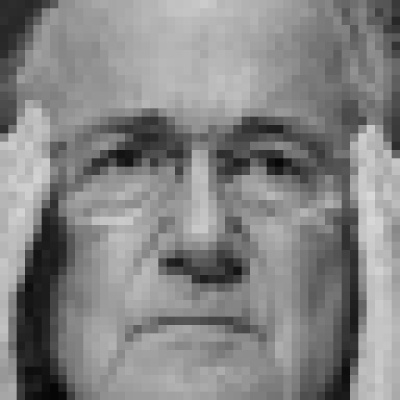

In [7]:
# Show confusion matrix, classification report, and visualize misclassified images
show_classification_performance(model, test_dir)